<a href="https://colab.research.google.com/github/BastiaanRibbers/test/blob/main/FYS_2021_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FYS_2021 ASSIGNMENT 1

In [116]:
import kagglehub
import pandas as pd

# Show all columns, no truncation
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

#Download latest version of the spotify tracks dataset, could be using the Colab caching.
datasetpath = kagglehub.dataset_download("zaheenhamidani/ultimate-spotify-tracks-db")
spotifyFeaturesDataset = f"{path}/SpotifyFeatures.csv"
#Import the data set
spotifyFeatures = pd.read_csv(spotifyFeaturesDataset)

Using Colab cache for faster access to the 'ultimate-spotify-tracks-db' dataset.


# 1a: read spotifyFeatures dataset

In [117]:
print(f"Number of samples (songs): {spotifyFeatures.size}")
print(f"Number of features (song properties): {spotifyFeatures.columns.size}")

Number of samples (songs): 4189050
Number of features (song properties): 18


1b: select genre, liveness and loudness where genre is classical or pop, and map pop to 1 and classical to 0

In [118]:
classicalAndPop = spotifyFeatures.loc[spotifyFeatures["genre"].isin(["Pop","Classical"]), ["genre", "liveness" , "loudness"]]
classicalAndPop.insert(0, "index", range(len(classicalAndPop)))
classicalAndPop["genre"] = classicalAndPop["genre"].map({"Classical": 0, "Pop": 1})

1c: make two numpy arrays matrix index/liveness/loudness and a vector index/genre

In [120]:
import numpy as np

livenessLoudness = classicalAndPop[["index","liveness", "loudness"]].to_numpy()
genre = classicalAndPop[["index","genre"]].to_numpy()

1d: plot liveness/loudness plot

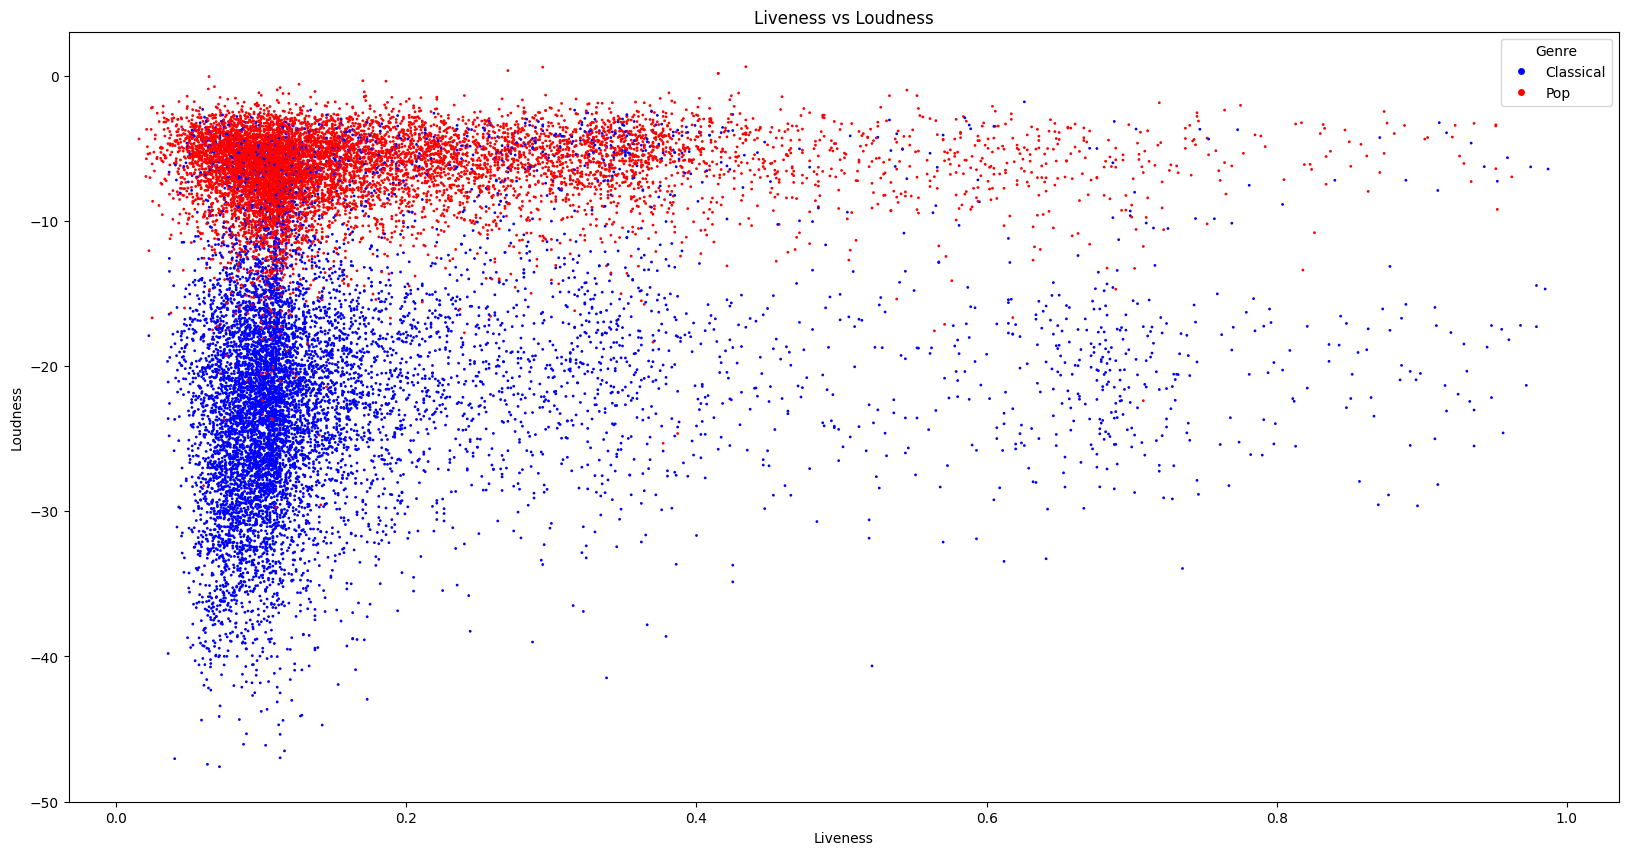

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(classicalAndPop.to_numpy()[:, 2], classicalAndPop.to_numpy()[:, 3],s=1,c=classicalAndPop.to_numpy()[:,1],cmap="bwr")
plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.title("Liveness vs Loudness")

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Classical',
           markerfacecolor='blue', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Pop',
           markerfacecolor='red', markersize=6)
]
plt.legend(handles=legend_elements, title="Genre")
plt.show()